# Data Cleaning  of emissions and land dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Carbon Dioxide Emission Estimates.csv')
dfl=pd.read_csv('Land.csv') 


# Encontrar los años coincidentes en los dos dataset  

In [3]:
#Extraer los años de los dataset
añose = df['Year'].unique()
añosl = dfl['Year'].unique()
#Enontrar los años que estan presentes en los dos dataset
años_coincidentes = np.intersect1d(añose, añosl)
#Filtrar los dataset solo con los años que estan en los dos datasets
dfemi= df[(df['Year'].isin(años_coincidentes))]
dfland=dfl[(dfl['Year'].isin(años_coincidentes))]
#Nombrar las columnas
dfemi.columns=['Country','Year','Type','Value']
dfland.columns=['Country','Year','Type','Value']



#OTRA MANERA
#AñosE = set(df['Year'].unique())
#AñosL = set(dfl['Year'].unique())
#años_coincidentes = list(AñosE.intersection(AñosL))
#print(años_coincidentes)
#Este código utiliza set() para convertir los arrays de años únicos en conjuntos y luego aplica la función intersection() para encontrar la intersección de los conjuntos, es decir, los años que son comunes en ambos DataFrames. La lista resultante, años_coincidentes, contendrá esos años.
#DFETCO2 = df[(df['Year'].isin(años_coincidentes))]
#DFLand=dfl[(dfl['Year'].isin(años_coincidentes))]

# Filtrar los paises de suramerica

## Filtrar los paises presentes en los dos datasets

In [4]:

#Extraer los paises del dataset
paisesl=dfland['Country'].unique()
paisese=dfemi['Country'].unique()
#Debido a la naturaleza del dataset y los nombres de los paises, es necesario(solo para sur america) extraer las primeras palabras de cada pais
paisesl=[(pais.split(' ')[0]) for pais in paisesl]
paisese=[(pais.split(' ')[0]) for pais in paisese]
#1.pais.split(): Para cada pais en paises_sudamerica, pais.split() divide la cadena pais en palabras (separadas por espacios) y devuelve una lista con estas palabras.
#2 pais.split()[0]: Después de dividir la cadena pais en palabras, [0] se agrega para seleccionar solo el primer elemento de esta lista (es decir, la primera palabra de pais).}
#3 [pais.split()[0] for pais in paises_sudamerica]: Esto es una comprensión de lista, que combina un bucle for con una expresión de lista. En cada iteración del bucle for, se ejecuta la expresión pais.split()[0], que toma la lista de palabras generada por pais.split() y selecciona solo el primer elemento de esta lista. El resultado es una nueva lista que contiene solo las primeras palabras de cada elemento en la lista paises_sudamerica.
# escribir una lista con los paises de sur america
paises_sudamerica = [
    "Argentina",
    "Bolivia",
    "Brazil",
    "Chile",
    "Colombia",
    "Ecuador",
    "Guyana",
    "Paraguay",
    "Peru",
    "Suriname",
    "Uruguay",
    "Venezuela","Trinidad"
]
#Hacer la interseccion de paises de sur america que esten los dos dataframes
paisescoincidentes=np.intersect1d(paisese,paisesl)
paisescoincidentessur = np.intersect1d(paisescoincidentes, paises_sudamerica)
paisescoincidentessur


array(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
       'Paraguay', 'Peru', 'Suriname', 'Trinidad', 'Uruguay', 'Venezuela'],
      dtype='<U13')

## Land

In [5]:
dfland=dfland.copy() #se hace esto para trabajar explicitimante sobre una copia de los datos y no una vista del dataframe original
#se agrega otra columna con las primeras palabras de cada pais
dfland['Country_processed'] = dfland['Country'].apply(lambda x: x.split()[0])
#agreg
dfpaisesañosl = dfland[dfland['Country_processed'].isin(paisescoincidentessur)]
#si quiero volver todo minusculas uso .str.lower. lambda x equivale a:  [pais.split()[0] for pais in paises]
dfpaisesañosl=dfpaisesañosl.drop(columns=['Country_processed'])
print(dfpaisesañosl['Country'].unique())

['Argentina' 'Bolivia (Plurin. State of)' 'Brazil' 'Chile' 'Colombia'
 'Ecuador' 'Paraguay' 'Peru' 'Suriname' 'Trinidad and Tobago' 'Uruguay'
 'Venezuela (Boliv. Rep. of)']


## Emissions

In [6]:
dfemi=dfemi.copy()
dfemi['Country_processed'] = dfemi['Country'].apply(lambda x: x.split()[0])
dfpaisesañose = dfemi[dfemi['Country_processed'].isin(paisescoincidentessur)]
dfpaisesañose=dfpaisesañose.drop(columns=['Country_processed'])
dfpaisesañose['Country'].unique()

array(['Argentina', 'Bolivia (Plurin. State of)', 'Brazil', 'Chile',
       'Colombia', 'Ecuador', 'Paraguay', 'Peru', 'Suriname',
       'Trinidad and Tobago', 'Uruguay', 'Venezuela (Boliv. Rep. of)'],
      dtype=object)

# Dividir los dataframes por tipo de dato

In [7]:
#dividir dataframes por type
#Emissions
datae_a=dfpaisesañose[dfpaisesañose['Type']=='Emissions per capita (metric tons of carbon dioxide)']
datae_b=dfpaisesañose[dfpaisesañose['Type']=='Emissions (thousand metric tons of carbon dioxide)']
#Land
datal_a=dfpaisesañosl[dfpaisesañosl['Type']=='Land area (thousand hectares)']
datal_b=dfpaisesañosl[dfpaisesañosl['Type']=='Permanent crops (thousand hectares)']
datal_c=dfpaisesañosl[dfpaisesañosl['Type']=='Forest cover (thousand hectares)']
datal_d=dfpaisesañosl[dfpaisesañosl['Type']=='Arable land (thousand hectares)']

# Escribir los datos en hojas de excel

In [8]:
#Escribir datos en excel
Years= pd.DataFrame(dfpaisesañosl['Year'].unique())
Years.columns=['Year']
Countrys=pd.DataFrame(dfpaisesañosl['Country'].unique())
Countrys.columns=['Country']
with pd.ExcelWriter('Dataclean.xlsx') as writer:
      datae_a.to_excel(writer,sheet_name='Emissions per capita',index=False)
      datae_b.to_excel(writer ,sheet_name='Emissions',index=False)
      datal_a.to_excel(writer,sheet_name='Land area',index=False)
      datal_b.to_excel(writer ,sheet_name='Permanent crops',index=False)
      datal_c.to_excel(writer ,sheet_name='Forest cover',index=False)
      datal_d.to_excel(writer ,sheet_name='Arable land',index=False)
      Years.to_excel(writer,sheet_name='Years',index=False)
      Countrys.to_excel(writer,sheet_name='Countrys',index=False)



## Escribir los datos en SQL

In [9]:
import sqlite3
import pandas as pd

# Conexión a la base de datos

conn = sqlite3.connect('dataclean.db')

# Función para escribir DataFrame en tabla SQL
def escribir_tabla_sql(dataframe, nombre_tabla, conn):
    dataframe.to_sql(nombre_tabla, conn, if_exists='replace', index=False)

# Escribe cada DataFrame en una tabla SQL
escribir_tabla_sql(datae_a, 'Emissions per capita', conn)
escribir_tabla_sql(datae_b,'Emissions', conn)
escribir_tabla_sql(datal_a,'Land area',conn)
escribir_tabla_sql(datal_b,'Permanent crops',conn)
escribir_tabla_sql(datal_c,'Forest cover',conn)
escribir_tabla_sql(datal_d,'Arable land',conn)
escribir_tabla_sql(Years,'Years',conn)
escribir_tabla_sql(Countrys,'Countrys',conn)

# Confirmar los cambios y cerrar la conexión
conn.commit()
conn.close()

In [10]:
#df_suma=dfpaisesañosE.groupby('Country').sum()
#df_suma
data_sum=datae_a[['Country','Value']].groupby('Country').sum().reset_index()

# Seaborn

,Country,Value
9,Trinidad and Tobago,42.850
11,Venezuela (Boliv. Rep. of),14.604
0,Argentina,12.176
3,Chile,12.005
8,Suriname,9.961
5,Ecuador,5.998
2,Brazil,5.600
10,Uruguay,5.014
1,Bolivia (Plurin. State of),4.340
4,Colombia,4.085


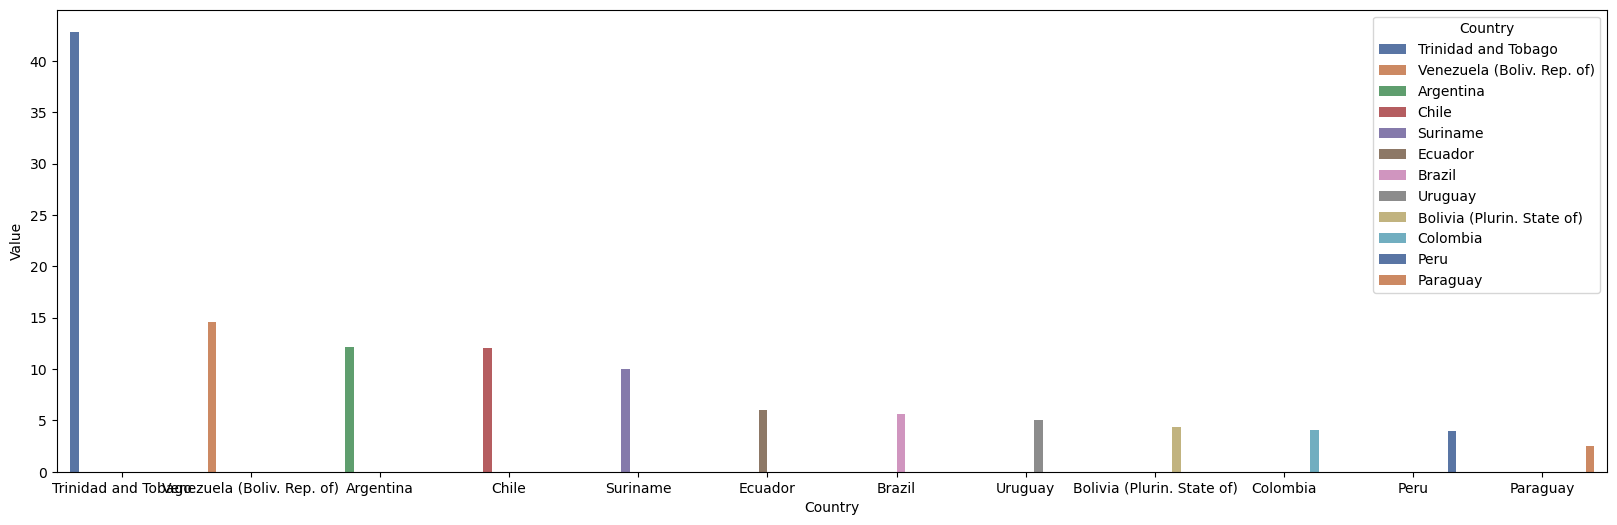

In [11]:
import seaborn as sns
plt.figure(figsize=(20, 6))
datasorted=data_sum.sort_values(by='Value',ascending=False)
g=sns.barplot(x='Country',y='Value',hue='Country', ci=None,palette="deep", data=datasorted,order=None)
datasorted.head(12)

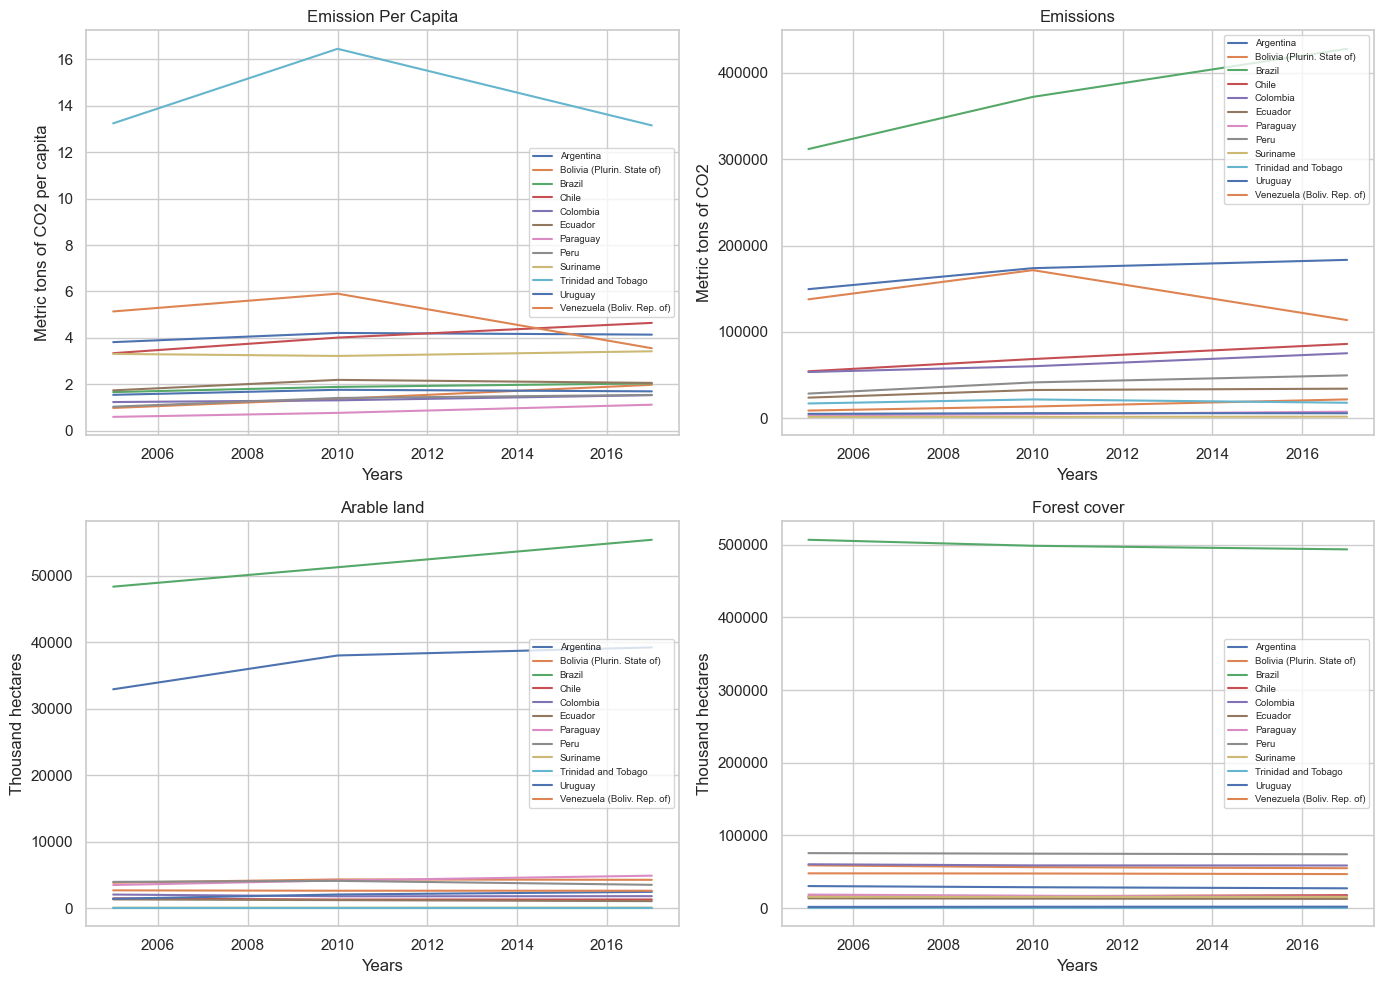

In [44]:
#Emissions per capita
plt.figure(figsize=(14, 10))
plt.subplot(2,2,1)
sns.set_theme(style="whitegrid")
gea=sns.lineplot(x='Year',y='Value',hue='Country',palette="deep",data=datae_a)
gea.set_xlabel("Years")
gea.set_ylabel("Metric tons of CO2 per capita")
gea.set_title("Emission Per Capita")
plt.legend(fontsize='xx-small',loc='best')#opciones: x-small,small,medium,large,x-large,etc. loc: upper right,lower left, center, etc.
#Emissions
#plt.figure(figsize=(12, 5))
plt.subplot(2, 2,2)
sns.set_theme(style="whitegrid")
gea=sns.lineplot(x='Year',y='Value',hue='Country',palette="deep",data=datae_b)
gea.set_xlabel("Years")
gea.set_ylabel("Metric tons of CO2")
gea.set_title("Emissions")
plt.legend(fontsize='xx-small',loc='best')
#Arable land
#plt.figure(figsize=(12, 5))
plt.subplot(2, 2, 3)
sns.set_theme(style="whitegrid")
gea=sns.lineplot(x='Year',y='Value',hue='Country',palette="deep",data=datal_d)
gea.set_xlabel("Years")
gea.set_ylabel("Thousand hectares")
gea.set_title("Arable land")
plt.legend(fontsize='xx-small',loc='best')
#Forest cover
#plt.figure(figsize=(12, 5))
plt.subplot(2, 2, 4)
sns.set_theme(style="whitegrid")
gea=sns.lineplot(x='Year',y='Value',hue='Country',palette="deep",data=datal_c)
gea.set_xlabel("Years")
gea.set_ylabel("Thousand hectares")
gea.set_title("Forest cover")
plt.legend(fontsize='xx-small',loc='best')
plt.tight_layout()
plt.show()

,Country,Year,Type,Value
18,Argentina,2005,Emissions (thousand metric tons of carbon diox...,149476.040
19,Argentina,2010,Emissions (thousand metric tons of carbon diox...,173768.538
20,Argentina,2017,Emissions (thousand metric tons of carbon diox...,183375.203
78,Bolivia (Plurin. State of),2005,Emissions (thousand metric tons of carbon diox...,8975.809
79,Bolivia (Plurin. State of),2010,Emissions (thousand metric tons of carbon diox...,13637.623


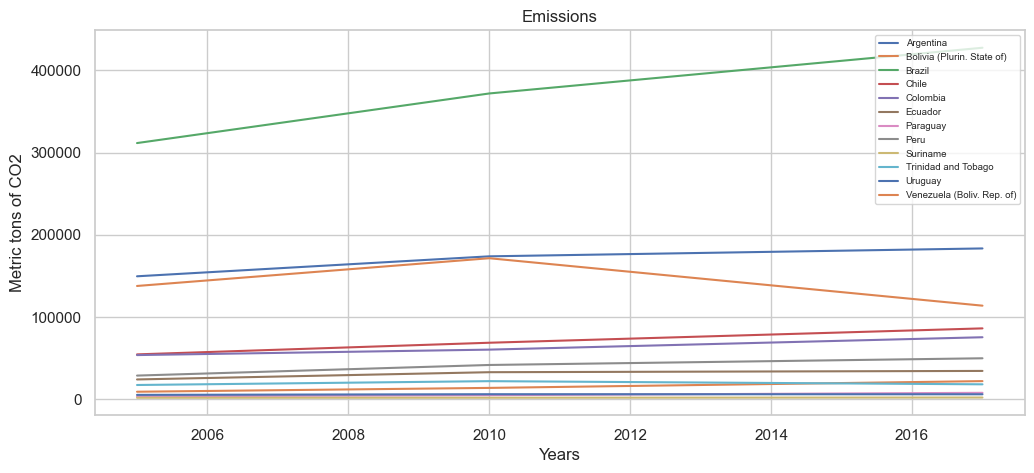

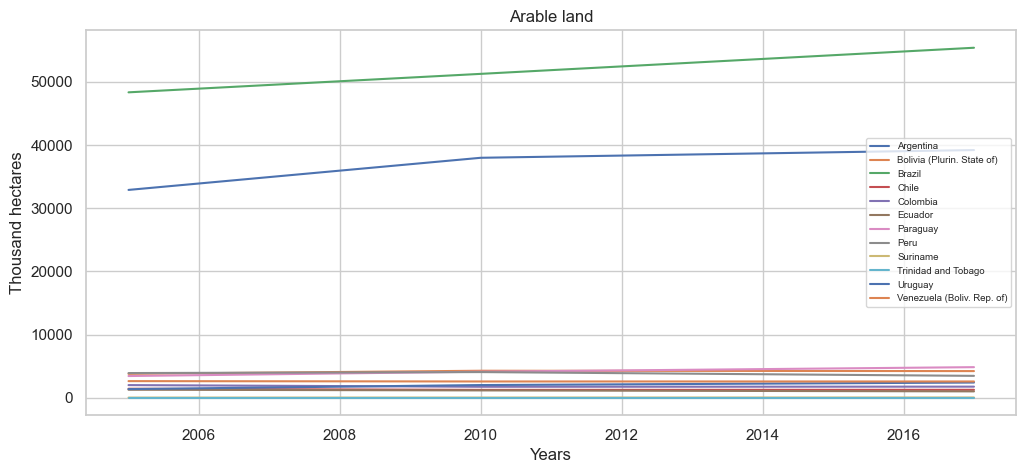

,Country,Year,Type,Value
867,Argentina,2005,Forest cover (thousand hectares),30186.0
875,Argentina,2010,Forest cover (thousand hectares),28596.0
883,Argentina,2017,Forest cover (thousand hectares),27112.0
1255,Bolivia (Plurin. State of),2005,Forest cover (thousand hectares),58734.0
1263,Bolivia (Plurin. State of),2010,Forest cover (thousand hectares),56209.0


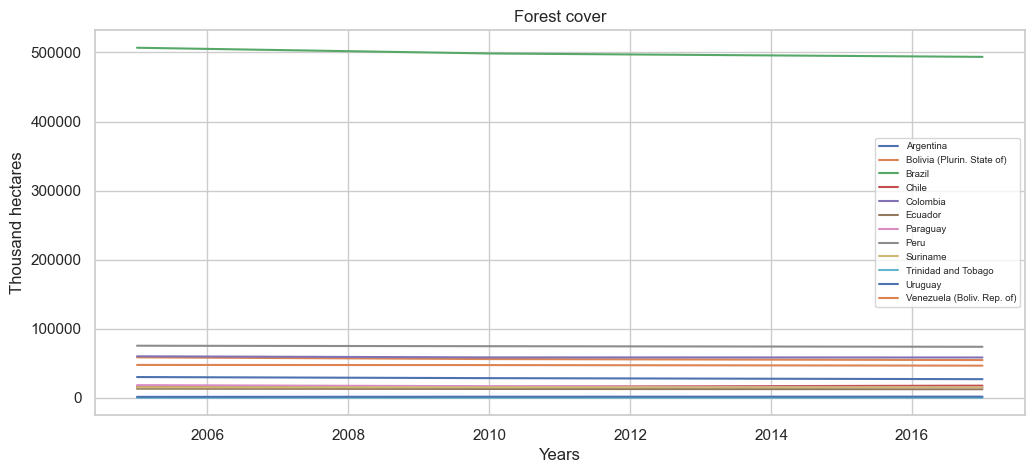